# Exploratory data analysis on game streaming on Twitch (2016-2022)

### Project Assignment of Scripting Languages 

Dawn Zhuang (r0914937)

## Introduction 
This exploratory data analysis used the `Top games on Twitch 2016 - 2022` and `Computer Games Dataset` datasets to reveal general trends of game streaming on Twitch (an influential live streaming platform for video games), popular games among viewers and streamers, and popular game genres in game streaming during 2016-2022.

### Datasets
Two datasets were downloaded from Kaggle to examine game streaming data from Twitch (2016-2022) and obtain information about the genre and developer of the specific games:

1. [Top games on Twitch 2016 - 2022](https://www.kaggle.com/datasets/rankirsh/evolution-of-top-games-on-twitch): This dataset contains the top 200 games on Twitch for each month from 2016 to 2022 (last version updated January 13, 2023) and the corresponding monthly rank, ranking year and month, total watching hours, total streaming hours, peak viewers, peak channels, steamer volume, average viewer volume, average channel volume, and average viewer ratio (Avg_viewers / Avg_channels) of each game.


2. [Computer Games Dataset](https://www.kaggle.com/datasets/iamsouravbanerjee/computer-games-dataset): This dataset consists of a list of PC games, which contains an alphabetically ordered and segmented table of video games that are playable on PC, but not exclusively on PC, with information on the developer, producer, genre, operating system, and release date of each game.

## 0. Data preparation

In [1]:
# import libraries for creating data frame and data visualisation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read the game streaming dataset in csv
# since there are letters could not be encoded in utf-8, the encoding code was set as "cp1252"
df = pd.read_csv('Twitch_game_data.csv', encoding = "cp1252")

Inspect the instances and features in the dataset:

In [3]:
df.shape

(16800, 12)

In [4]:
df.head()

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03


In [5]:
df.tail()

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
16795,196,SCUM,12,2022,608613(68.5%),47458(64.7%),26987(320.9%),151(18.9%),3591(41.5%),819(63.1%),63(57.5%),12.82(2.3%)
16796,197,Dungeon Fighter Online,12,2022,606520(7.9%),17372(14.3%),5243(-85.2%),70(-13.6%),742(25.5%),816(4.3%),23(9.5%),34.91(-5.6%)
16797,198,Detroit: Become Human,12,2022,600990(49.6%),21395(10.0%),23681(158.1%),92(35.3%),5198(9.0%),808(44.8%),28(3.7%),28.09(36.0%)
16798,199,Super People,12,2022,597551(-53.5%),29116(-57.1%),23584(38.7%),124(-51.2%),3432(-51.8%),804(-55.0%),39(-58.5%),20.52(8.3%)
16799,200,Don't Starve Together,12,2022,584408(5.8%),25892(-7.7%),16785(-4.5%),79(-7.1%),4845(-4.0%),786(2.3%),34(-10.5%),22.57(14.6%)


Some cleaning and transforming steps were taken before analysis:

In [6]:
# lowercase all column names for further processing
df.columns= df.columns.str.lower()

In [7]:
# replace the unicode in values of the game names
df['game'] = df['game'].str.replace('<U+00E9>', 'é', regex=False)

In [8]:
# delete the non numerical value "hours" in column "hours_streamed"
df['hours_streamed'] = df['hours_streamed'].str.replace(' hours', '', regex = False)

In [9]:
# delete all the appendixed percentage information (with the format of "(+/- int/float %)") 
# following the integer values in the dataframe with regex 
df = df.replace(r'\(.*?\)', '', regex=True)

In [10]:
# check the data frame after modification
df.head()

,rank,game,month,year,hours_watched,hours_streamed,peak_viewers,peak_channels,streamers,avg_viewers,avg_channels,avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578,71639,3620,214054,21740,1549,14.03


In [11]:
# convert the data type of all numeric columns into int or float for later calculation
for col in df.columns[4:]:
    df[col] = pd.to_numeric(df[col])

In [12]:
# check the data types of the data frame after manipulation
df.dtypes

rank                  int64
game                 object
month                 int64
year                  int64
hours_watched         int64
hours_streamed        int64
peak_viewers          int64
peak_channels         int64
streamers             int64
avg_viewers           int64
avg_channels          int64
avg_viewer_ratio    float64
dtype: object

In [13]:
# in later steps, records with 'Talk Shows & Podcasts' and 'Just Chatting' as game names were found streaming categories 
# rather than game names
# so they are dropped from the data frame
df_clear = df.drop(df[(df['game'] == 'Talk Shows & Podcasts') | (df['game'] == 'Just Chatting')].index)

After data cleaning and transformation, further exploratory analysis could be performed.

## 1. General trend of game streaming

In [14]:
# overview of the statistics of each feature
df_clear.iloc[:,4:].describe()

,hours_watched,hours_streamed,peak_viewers,peak_channels,streamers,avg_viewers,avg_channels,avg_viewer_ratio
count,1.666400e+04,1.666400e+04,1.666400e+04,16664.000000,1.666400e+04,16664.000000,16664.000000,16664.000000
mean,4.785121e+06,1.650682e+05,5.784109e+04,619.220115,1.926438e+04,6560.456913,225.836474,77.766117
std,1.482395e+07,5.397350e+05,1.379428e+05,2682.069689,5.842519e+04,20331.966695,739.867356,345.710258
min,8.981100e+04,1.900000e+01,4.410000e+02,1.000000,0.000000e+00,120.000000,0.000000,1.670000
25%,4.180942e+05,1.371050e+04,9.036750e+03,57.000000,1.666000e+03,573.000000,18.000000,16.210000
50%,9.259725e+05,3.525700e+04,2.176750e+04,136.000000,4.641500e+03,1270.000000,48.000000,29.090000
75%,2.549787e+06,9.676075e+04,4.944725e+04,345.000000,1.213950e+04,3502.000000,132.000000,56.535000
max,3.445520e+08,1.024570e+07,3.366021e+06,129860.000000,1.013324e+06,479209.000000,13789.000000,13601.870000


In [15]:
# calculate the correlation coefficient between each statistical feature
df_corr = df_clear.iloc[:,4:].corr()
df_corr

,hours_watched,hours_streamed,peak_viewers,peak_channels,streamers,avg_viewers,avg_channels,avg_viewer_ratio
hours_watched,1.000000,0.784526,0.698322,0.544609,0.723203,0.999571,0.784405,-0.018606
hours_streamed,0.784526,1.000000,0.534663,0.768083,0.940701,0.783969,0.999569,-0.043153
peak_viewers,0.698322,0.534663,1.000000,0.515646,0.526667,0.697884,0.534734,0.054761
peak_channels,0.544609,0.768083,0.515646,1.000000,0.724021,0.544797,0.768826,-0.030314
streamers,0.723203,0.940701,0.526667,0.724021,1.000000,0.723000,0.940715,-0.047274
avg_viewers,0.999571,0.783969,0.697884,0.544797,0.723000,1.000000,0.784545,-0.018633
avg_channels,0.784405,0.999569,0.534734,0.768826,0.940715,0.784545,1.000000,-0.043134
avg_viewer_ratio,-0.018606,-0.043153,0.054761,-0.030314,-0.047274,-0.018633,-0.043134,1.000000


<AxesSubplot:>

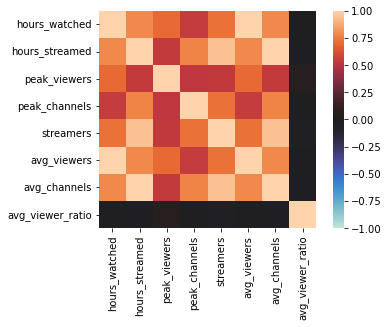

In [16]:
# plot the correlation coefficients with heatmap, setting the maximum value as 1 and minimum value as -1
sns.heatmap(df_corr, square = True, vmax = 1, vmin = -1, center = 0)

The correlation ratio shows that there is a very strong positive correlation (ratio above 0.9) between:
1. avg_viewers & hours_watched
2. avg_channels & streamers
3. hours_streamed & streamers
4. hours_streamed & avg_channels

From this, we can see that the more viewers a channel attracted, the more hours of watching it will achieve. And the more streamers a game has attracted, the more channels, the more streaming hours it will have.

### 1-1. Trend by year

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

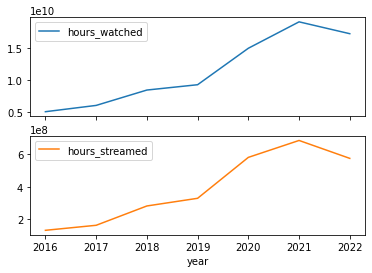

In [17]:
# plot the total watching and streaming hours changed by year

# since the avg_viewers & hours_watched and hours_streamed & streamers both have strong positive correlation,
# it is enough to just include watching and streaming hours in the anaylisis of streaming trend

yeardf = df_clear[['year','hours_watched','hours_streamed']]
yeardf.groupby('year').sum().plot.line(subplots = True, figsize = (6, 4))

As shown in the line graph, from 2019 to 2021, there is a rapid increase in both of the watching time and streaming time, which could be related to the lockdown measures taken against the pandemic outbreak globally. From 2021 to 2022, both values are decreasing, which may also related to the trend of normalisation of society after the pandemic.

In [18]:
# sort the top 50 games with the most peak viewers records
peakviewer = df_clear[['year','month','game','peak_viewers']].sort_values(by = ['peak_viewers'], ascending = False)[:50]
peakviewer

,year,month,game,peak_viewers
15410,2022,6,Special Events,3366021
16402,2022,11,League of Legends,3145012
10627,2020,6,Special Events,3123208
14002,2021,11,League of Legends,3082772
13011,2021,6,Special Events,2466023
13801,2021,10,League of Legends,2364918
10602,2020,6,Fortnite,2331987
14408,2022,1,Minecraft,2189881
11235,2020,9,Special Events,2184938
11822,2020,12,Special Events,2058657


<AxesSubplot:title={'center':'Year with the most peak viewers records'}>

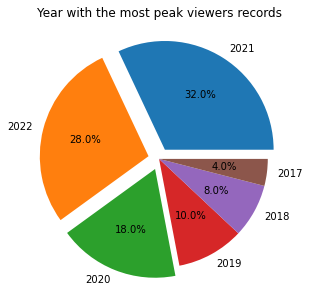

In [19]:
# plot the propotion of years with the top 50 most top viewers records
peakviewer['year'].value_counts().plot.pie(autopct='%1.1f%%', explode=(0.1, 0.1, 0.1, 0, 0, 0), 
                                           title='Year with the most peak viewers records', 
                                           ylabel='', figsize = (5,5))

Comparision of the proportions of the 50 peak viewer records of each year in the pie chart confirms the earlier finding that 2020, 2021, and 2022 have the most peak viewer records. This could also be due to the global lockdown measures against the pandemic starting in the spring of 2020.

### 1-2. Month with the most watching hours

In [20]:
# create a month name dictionary to replace the number of month 
month_replace_dict = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

In [21]:
# replace the month names in the data frame with the dictionary
df_clear = df_clear.replace({'month': month_replace_dict})

In [22]:
# find which month possesses the most watching hours in total during 2016-2022 on Twitch
df_clear.groupby('month')['hours_watched'].sum().sort_values(ascending = False)

month
May    7034684999
Apr    7006797560
Oct    6929956659
Aug    6836708878
Jan    6612877682
Mar    6603278806
Jul    6589953615
Jun    6577954039
Dec    6509691321
Nov    6508065480
Sep    6428160906
Feb    6101134048
Name: hours_watched, dtype: int64

<AxesSubplot:ylabel='month'>

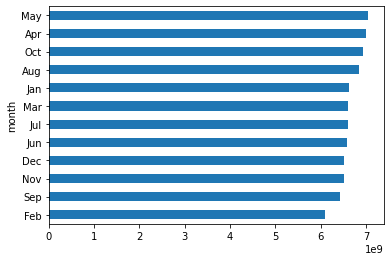

In [23]:
# plot the competition of total watching hours among different months
df_clear.groupby('month')['hours_watched'].sum().sort_values().plot.barh()

The result shows that May, April, October, and August are generally the time when viewers spend the most time watching game streaming on Twitch.

## 2. Most popular game among viewers
To define "popular" in the data, games were sorted by four characteristics: 
1. the time a game ranked first among the top 200 game list on Twitch 
2. total watching hours
3. average viewers
4. the time a game reached the 50 peak viewer records

### 2-1. Games ranked first in the top 200 games list the most

<AxesSubplot:>

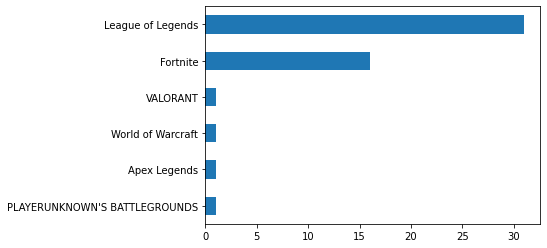

In [24]:
# sort the games by counting the times of being ranked as the first in the top 200 list
df_clear.loc[df_clear['rank'] == 1]['game'].value_counts().sort_values().plot.barh()

### 2-2. Game with the longest watching hours

<AxesSubplot:ylabel='game'>

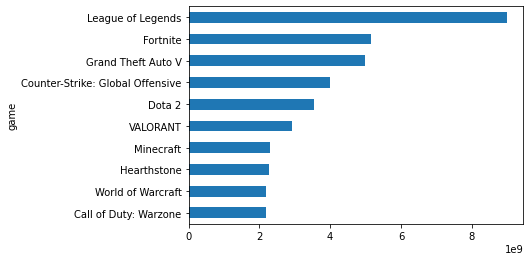

In [25]:
# plot the top 10 games with the longest watching hours
mostwatch = df_clear.groupby('game')['hours_watched'].sum().sort_values(ascending = False)[:10]
mostwatch.sort_values().plot.barh()

### 2-3. Game with the most viewers

<AxesSubplot:ylabel='game'>

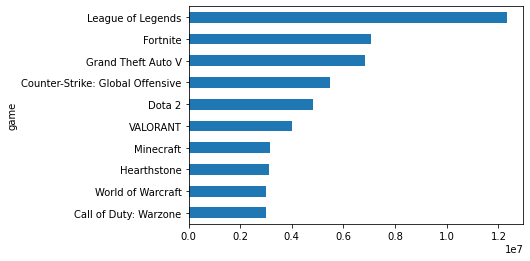

In [26]:
# plot the top 10 games with the most monthly average viewers in total
mostviewer = df_clear.groupby('game')['avg_viewers'].sum().sort_values(ascending = False)[:10]
mostviewer.sort_values().plot.barh()

### 2-4. Game with the most peak viewers records

In [27]:
# sort the games with the time it achieved the top 50 peak viewers records
peakviewergame = peakviewer['game'].value_counts()
peakviewergame

Special Events                      11
League of Legends                    9
Fortnite                             7
Counter-Strike: Global Offensive     6
Minecraft                            2
VALORANT                             2
Grand Theft Auto V                   2
Rust                                 1
E3 2017                              1
Cyberpunk 2077                       1
Lost Ark                             1
Call of Duty: Warzone                1
Overwatch                            1
Sports                               1
Dota 2                               1
E3 2018                              1
Arcane                               1
World of Warcraft                    1
Name: game, dtype: int64

<AxesSubplot:>

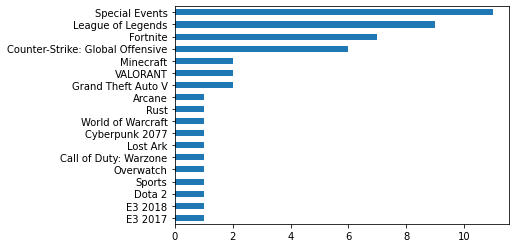

In [28]:
# plot the peak viewer records competition of games
peakviewergame.sort_values().plot.barh()

From 2.1 to 2.3, when it comes to sorting by watching hours or number of viewers, "League of Legends" and "Fortnite" always ranked in the top 2. When it comes to records of peak viewers, "Special Events" has taken the top spot from the others.

It can be concluded that "League of Legends" and "Fortnite" are the most popular games among viewers on Twitch in 2016-2022. And the popularity of "Special Events" should not be underestimated either.

## 3. Most popular game among streamers

To define "popular" in the data, games were sorted by three characteristics:
1. total number of streaming hours
2. total number of streamers
3. the time a game reached the top 50 peak channels records

### 3-1. Game with the longest streaming hours

<AxesSubplot:ylabel='game'>

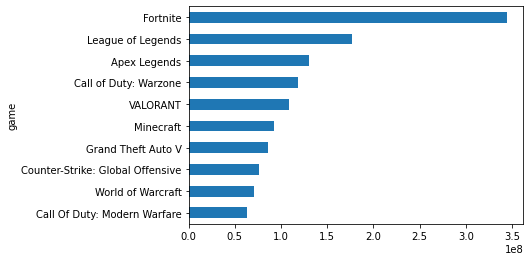

In [29]:
# plot the top 10 games with the longest streaming hours
longeststream = df_clear.groupby('game')['hours_streamed'].sum().sort_values(ascending = False)[:10]
longeststream.sort_values().plot.barh()

### 3-2. Game with the most streamers

<AxesSubplot:ylabel='game'>

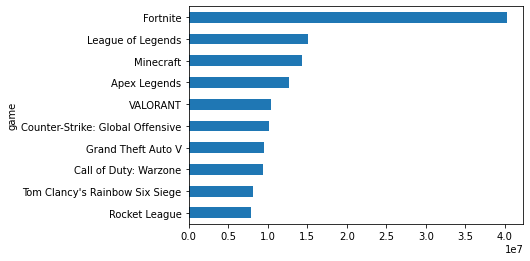

In [30]:
# plot the top 10 games with the most streamers
moststreamer = df_clear.groupby('game')['streamers'].sum().sort_values(ascending = False)[:10]
moststreamer.sort_values().plot.barh()

### 3-3. Game with the most peak channels records

In [31]:
# sort the top 50 games with the most peak channels
peakchannels = df_clear[['year','month','game','peak_channels']].sort_values(by = ['peak_channels'], ascending = False)[:50]
peakchannels

,year,month,game,peak_channels
11801,2020,Dec,Fortnite,129860
10602,2020,Jun,Fortnite,115814
14205,2021,Dec,Fortnite,88824
13607,2021,Sep,Fortnite,82928
7402,2019,Feb,Fortnite,67544
16606,2022,Dec,Fortnite,60854
10203,2020,Apr,Fortnite,59676
7200,2019,Jan,Fortnite,56274
13404,2021,Aug,Fortnite,52969
8000,2019,May,Fortnite,51473


In [32]:
# sort the games with the time it achieved the top 50 peak channels records
peakchannelgame = peakchannels['game'].value_counts()
peakchannelgame

Fortnite                            33
Call of Duty: Warzone                4
Destiny 2                            3
Call Of Duty: Modern Warfare         2
World of Warcraft                    2
Call of Duty: Modern Warfare II      2
Cyberpunk 2077                       1
Call of Duty: Black Ops Cold War     1
Elden Ring                           1
Apex Legends                         1
Name: game, dtype: int64

<AxesSubplot:>

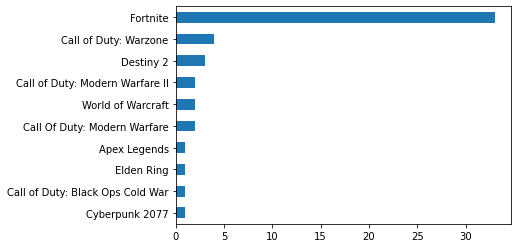

In [33]:
# plot the peak channles records competition of games
peakchannelgame.sort_values().plot.barh()

Whether it is sorting by streaming hours, number of streamers, or peak channels, "Fortnite" far outperforms its competitors. This means that "Fortnite" is the most popular game among the streamers on Twitch in 2016-2022.

## 4. Long-running popular game on the platform during 2016-2022

In [34]:
# select the top 50 games of each month
top50 = df_clear.loc[df_clear['rank'] <= 50]
top50

,rank,game,month,year,hours_watched,hours_streamed,peak_viewers,peak_channels,streamers,avg_viewers,avg_channels,avg_viewer_ratio
0,1,League of Legends,Jan,2016,94377226,1362044,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,Jan,2016,47832863,830105,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,Jan,2016,45185893,433397,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,Jan,2016,39936159,235903,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,Jan,2016,16153057,1151578,71639,3620,214054,21740,1549,14.03
...,...,...,...,...,...,...,...,...,...,...,...,...
16645,46,Old School RuneScape,Dec,2022,5051021,106387,36528,351,7161,6798,143,47.48
16646,47,The Witcher 3: Wild Hunt,Dec,2022,4763272,147257,81860,766,20991,6410,198,32.35
16647,48,New World,Dec,2022,4644720,150349,30979,444,11533,6251,202,30.89
16648,49,Black Desert,Dec,2022,4601405,136857,59503,360,8630,6193,184,33.62


In [35]:
# find the games appear in the top50 game list every month in 7 years
popgames = top50[top50['game'].map(top50['game'].value_counts()) >= 84]
popgames['game'].value_counts()

League of Legends                   84
Counter-Strike: Global Offensive    84
Dota 2                              84
Hearthstone                         84
Minecraft                           84
World of Warcraft                   84
Tom Clancy's Rainbow Six Siege      84
Grand Theft Auto V                  84
Rocket League                       84
Name: game, dtype: int64

The above result lists the games that appear in the top 50 list every month and can be considered the most enduringly popular games on Twitch over the last 7 years.

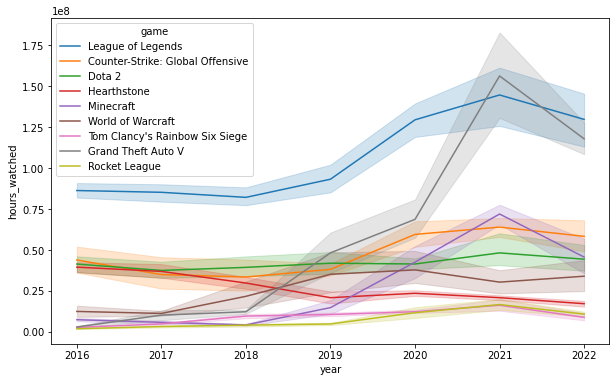

In [36]:
# plot the watching hours trend by year for the 9 long-running popular games
plt.figure(figsize = (10, 6))
sns.lineplot(x='year', y='hours_watched', hue='game', data=popgames)
plt.show()

Among the nine long-running popular games, there is no big changes in the watching hours of the bottom five games over the past seven years, and the games "Counter-Strike: Global Offensive" and "Minecraft" reached their peaks in 2020 and 2021, respectively.

"League of Legends" has outperformed most games over the past seven years, reaching nearly twice as many viewing hours as the other games each year. Only in 2021 was it surpassed by "Grand Theft Auto V."

In 2020-2021, "Grand Theft Auto V" had the fastest growing watching hours, and "Minecraft" also saw a significant increase in its watching hours.

However, the growth of watching hours slowed or even declined for all games from 2021. And "League of Legends" ranked first again in watching hours in the 2021-2022 period among all long-running popular games.

## 5. Analysis on popular game genre

In order to explore further on the distribution of the genre of the popular games, another dataset including the genre and developer information was imported in the analysis.

### 5-1. Data preparation for the second dataset

In [37]:
# cread data frame for the second dataset of computer games
df2 = pd.read_csv('computer_games.csv')

In [38]:
# lowercase the column names in the second data frame for consistency 
df2.columns= df2.columns.str.lower()

In [39]:
# rename the column of game's name in df2 to be the same as that in df_clear, as a key to merge the two datasets 
df2 = df2.rename(columns={'name':'game'})

In [40]:
# check data frame 2 after modification
df2.head()

,game,developer,producer,genre,operating system,date released
0,A-Men 2,Bloober Team,Bloober Team,"Adventure, Puzzle",Microsoft Windows,"June 24, 2015"
1,A-Train,Artdink,"Artdink, Maxis, Ocean Software",Vehicle Simulation Game,"Windows, Mac",1985
2,A-10 Cuba!,Parsoft Interactive,Activision,Flight simulator,"Windows, Mac","November 30, 1996"
3,A.D. 2044,R.M.P. Software,LK Avalon,Adventure,Microsoft Windows,"September 6, 1996"
4,A.D.A.M. Life's Greatest Mysteries,Columbia Healthcare Corporation,Columbia Healthcare Corporation,Educational,Microsoft Windows,1996


In [41]:
# select the features for analysis in the long-running popular games data frame created earlier as a new data frame
popdf = popgames[['rank', 'game', 'year', 'month', 'hours_watched', 'hours_streamed', 'streamers', 'avg_viewers', 'peak_viewers', 'peak_channels']]
popdf

,rank,game,year,month,hours_watched,hours_streamed,streamers,avg_viewers,peak_viewers,peak_channels
0,1,League of Legends,2016,Jan,94377226,1362044,129172,127021,530270,2903
1,2,Counter-Strike: Global Offensive,2016,Jan,47832863,830105,120849,64378,372654,2197
2,3,Dota 2,2016,Jan,45185893,433397,44074,60815,315083,1100
3,4,Hearthstone,2016,Jan,39936159,235903,36170,53749,131357,517
5,6,Minecraft,2016,Jan,10231056,490002,88820,13769,64432,1538
...,...,...,...,...,...,...,...,...,...,...
16611,12,Counter-Strike: Global Offensive,2022,Dec,31315331,682014,105795,42147,280430,2323
16612,13,Dota 2,2022,Dec,30478967,585331,47284,41021,146152,1550
16623,24,Hearthstone,2022,Dec,15006816,109738,11968,20197,137028,558
16633,34,Rocket League,2022,Dec,7791967,660866,187887,10487,169232,2322


In [42]:
# merge the data frames of the long-running popular games with streaming information 
# with the one with game genre and developer information into a new data frame
# use the keys from left frame when merging
mergedf = pd.merge(popdf, df2, on=['game'], how = 'left')
mergedf

,rank,game,year,month,hours_watched,hours_streamed,streamers,avg_viewers,peak_viewers,peak_channels,developer,producer,genre,operating system,date released
0,1,League of Legends,2016,Jan,94377226,1362044,129172,127021,530270,2903,Riot Games,Riot Games,MOBA,"Microsoft Windows, macOS","October 27, 2009"
1,2,Counter-Strike: Global Offensive,2016,Jan,47832863,830105,120849,64378,372654,2197,Valve,Valve,First-person shooter,"Microsoft Windows, Linux, macOS","August 12, 2012"
2,3,Dota 2,2016,Jan,45185893,433397,44074,60815,315083,1100,Valve,Valve,MOBA,"Microsoft Windows, Linux, macOS","July 9, 2013"
3,4,Hearthstone,2016,Jan,39936159,235903,36170,53749,131357,517,Blizzard Entertainment,Blizzard Entertainment,Digital collectible card game,"Microsoft Windows, macOS","March 11, 2014"
4,6,Minecraft,2016,Jan,10231056,490002,88820,13769,64432,1538,Mojang,Mojang,Sandbox,"Microsoft Windows, Linux, macOS, Raspberry Pi","November 18, 2011"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,12,Counter-Strike: Global Offensive,2022,Dec,31315331,682014,105795,42147,280430,2323,Valve,Valve,First-person shooter,"Microsoft Windows, Linux, macOS","August 12, 2012"
752,13,Dota 2,2022,Dec,30478967,585331,47284,41021,146152,1550,Valve,Valve,MOBA,"Microsoft Windows, Linux, macOS","July 9, 2013"
753,24,Hearthstone,2022,Dec,15006816,109738,11968,20197,137028,558,Blizzard Entertainment,Blizzard Entertainment,Digital collectible card game,"Microsoft Windows, macOS","March 11, 2014"
754,34,Rocket League,2022,Dec,7791967,660866,187887,10487,169232,2322,Psyonix,Psyonix,Vehicular Soccer,Microsoft Windows,"July 7, 2015"


In [43]:
# check the 'NaN' values in the merged data frame
na = mergedf[mergedf.isna().any(axis=1)]
na['game'].value_counts()

Tom Clancy's Rainbow Six Siege    84
Name: game, dtype: int64

In [44]:
# check if there is a corresponding game record of the 'NaN' value in df2
df2[df2['game'].str.contains("Rainbow Six Siege")]

,game,developer,producer,genre,operating system,date released
924,Tom Clancy’s Rainbow Six Siege,Ubisoft,Ubisoft,First-person shooter,Microsoft Windows,"December 1, 2015"


In [45]:
# fix the mistake in punctuation in df2
df2 = df2.replace('Tom Clancy’s Rainbow Six Siege', "Tom Clancy's Rainbow Six Siege")

In [46]:
# merge the two data frames again
mergedf = pd.merge(popdf, df2, on=['game'], how = 'left')
mergedf

,rank,game,year,month,hours_watched,hours_streamed,streamers,avg_viewers,peak_viewers,peak_channels,developer,producer,genre,operating system,date released
0,1,League of Legends,2016,Jan,94377226,1362044,129172,127021,530270,2903,Riot Games,Riot Games,MOBA,"Microsoft Windows, macOS","October 27, 2009"
1,2,Counter-Strike: Global Offensive,2016,Jan,47832863,830105,120849,64378,372654,2197,Valve,Valve,First-person shooter,"Microsoft Windows, Linux, macOS","August 12, 2012"
2,3,Dota 2,2016,Jan,45185893,433397,44074,60815,315083,1100,Valve,Valve,MOBA,"Microsoft Windows, Linux, macOS","July 9, 2013"
3,4,Hearthstone,2016,Jan,39936159,235903,36170,53749,131357,517,Blizzard Entertainment,Blizzard Entertainment,Digital collectible card game,"Microsoft Windows, macOS","March 11, 2014"
4,6,Minecraft,2016,Jan,10231056,490002,88820,13769,64432,1538,Mojang,Mojang,Sandbox,"Microsoft Windows, Linux, macOS, Raspberry Pi","November 18, 2011"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,12,Counter-Strike: Global Offensive,2022,Dec,31315331,682014,105795,42147,280430,2323,Valve,Valve,First-person shooter,"Microsoft Windows, Linux, macOS","August 12, 2012"
752,13,Dota 2,2022,Dec,30478967,585331,47284,41021,146152,1550,Valve,Valve,MOBA,"Microsoft Windows, Linux, macOS","July 9, 2013"
753,24,Hearthstone,2022,Dec,15006816,109738,11968,20197,137028,558,Blizzard Entertainment,Blizzard Entertainment,Digital collectible card game,"Microsoft Windows, macOS","March 11, 2014"
754,34,Rocket League,2022,Dec,7791967,660866,187887,10487,169232,2322,Psyonix,Psyonix,Vehicular Soccer,Microsoft Windows,"July 7, 2015"


### 5-2. Promising genres of the long-running popular games

In [47]:
# sort the long-running popular games by genre and developer
mergedf.groupby('genre')[['game','developer']].value_counts()

genre                          game                              developer             
Digital collectible card game  Hearthstone                       Blizzard Entertainment    84
First-person shooter           Counter-Strike: Global Offensive  Valve                     84
                               Tom Clancy's Rainbow Six Siege    Ubisoft                   84
MOBA                           Dota 2                            Valve                     84
                               League of Legends                 Riot Games                84
Online role-playing game       World of Warcraft                 Blizzard Entertainment    84
Open world, action-adventure   Grand Theft Auto V                Rockstar North            84
Sandbox                        Minecraft                         Mojang                    84
Vehicular Soccer               Rocket League                     Psyonix                   84
dtype: int64

The above result shows that the most popular long-running popular games cover 7 genres and were published by 7 developers.

<AxesSubplot:title={'center':'Peak channels'}>

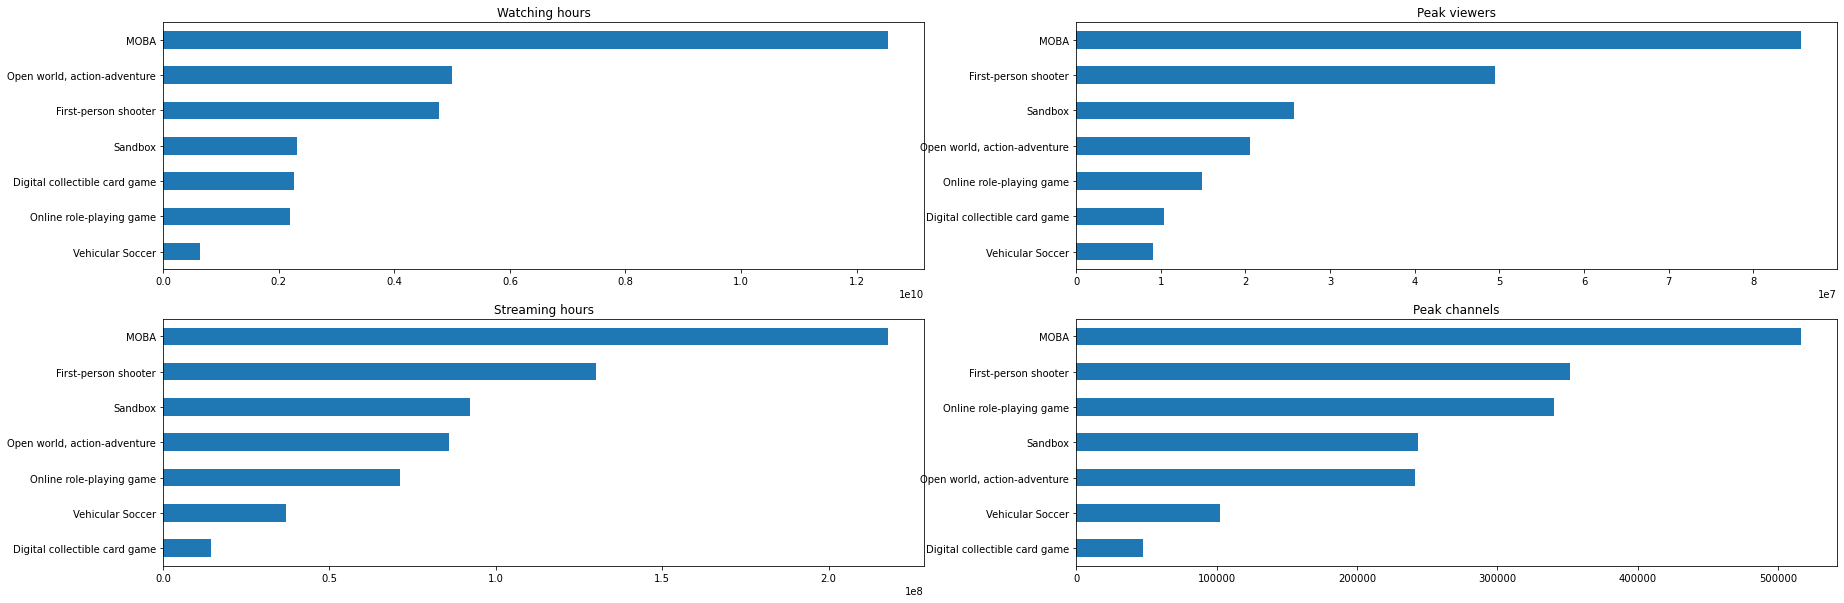

In [48]:
# compare the total watching hours/peak viewers/streaming hours/peak channels of different game genres with bar charts
plt.figure(figsize = (30, 10))

plt.subplot(221)
mergedf.groupby('genre')['hours_watched'].sum().sort_values().plot.barh(title='Watching hours', xlabel='')

plt.subplot(222)
mergedf.groupby('genre')['peak_viewers'].sum().sort_values().plot.barh(title='Peak viewers', xlabel='')

plt.subplot(223)
mergedf.groupby('genre')['hours_streamed'].sum().sort_values().plot.barh(title='Streaming hours', xlabel='')

plt.subplot(224)
mergedf.groupby('genre')['peak_channels'].sum().sort_values().plot.barh(title='Peak channels', xlabel='')

The charts above show that MOBA (Multiplayer Online Battle Arena Video Games) is the main genre of long-running popular games on Twitch, as it has the longest watching/streaming hours (more than 1/3 of the total in both features) and the most peak viewers/channels on the platform.

<AxesSubplot:xlabel='year', ylabel='hours_streamed'>

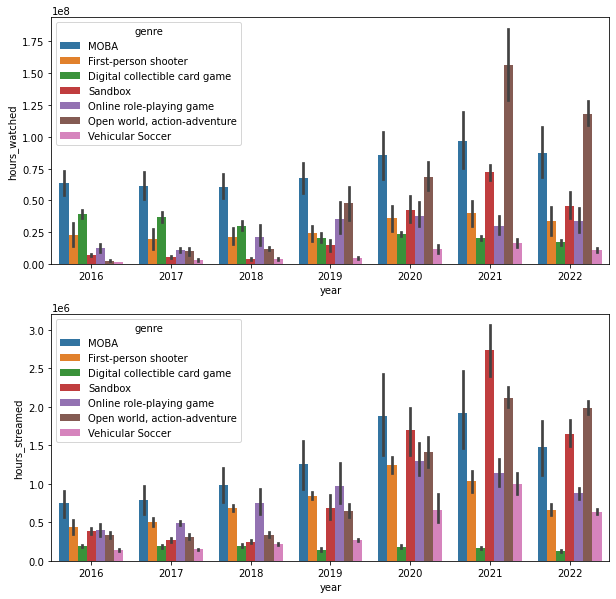

In [49]:
# compare the average watching hours and streaming hours of each genre by year in bar charts
plt.figure(figsize = (10, 10))
plt.subplot(211)
sns.barplot(x='year', y='hours_watched', hue='genre', data=mergedf)

plt.subplot(212)
sns.barplot(x='year', y='hours_streamed', hue='genre', data=mergedf)

However, the graphs above show an obvious trend of genre change for both watched and streamed games.

Prior to 2020, MOBA games were the leading genre among viewers and streammers. After 2020, the genre of "Open-world, action-adventure" games surpassed MOBA games in both viewership and streaming hours. And sandbox games also surpass MOBA games in streaming hours as of 2021, leading the way in 2021. 

And even if all genres saw a decline in watching and streaming hours from 2021 to 2022, "Open-world, action-adventure" games still took first place in both features.

This suggests that viewer interest has shifted from MOBA to the "Open-world, action-adventure" genres after the pandemic was contained. And open world and sandbox seem to be the two most potential game genres in the coming years in game streaming.